# Data Exploration & Preprocessing

In [ ]:
# Force reinstall all related packages to avoid binary mismatch
!pip install --upgrade --force-reinstall numpy pandas scipy scikit-learn gensim

#after this line run everything again except for the cell above

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.

## 1. Load the Dataset

First, let's load the dataset and inspect its structure.

In [ ]:
import pandas as pd
from google.colab import drive
import os
os.environ["WANDB_DISABLED"] = "true"

drive.mount('/content/drive')

#This is my path of the file. Comment it if you are running it and use the other row
df = pd.read_csv('/content/drive/MyDrive/train.csv')


#df = pd.read_csv('/content/train.csv')

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [ ]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


## 2. Handling Missing Data

Check missing values in the review text or sentiment label.

In [ ]:
df.isnull().sum()

,0
review_id,0
title,0
year,178
user_review,0
user_suggestion,0


In [ ]:
df.value_counts('title')

,count
title,
Robocraft,842
Eternal Card Game,791
Heroes & Generals,745
War Thunder,720
Fractured Space,718
Bless Online,712
The Elder Scrolls®: Legends™,565
Neverwinter,546
AdventureQuest 3D,519


## 3. Polarity Score


Calculate polarity score using TextBlob

In [ ]:
import nltk
from textblob import TextBlob
nltk.download('brown')
nltk.download('punkt')


# Calculate polarity for each review
df['polarity'] = df['user_review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,review_id,title,year,user_review,user_suggestion,polarity
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,-0.028125
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,0.228571
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,0.018193
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,0.354167
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,0.045408
...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,0.181707
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,0.060410
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,0.157005
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,0.108333


## 4. Text Preprocessing

Before training a model, we need to clean the text data.

Common preprocessing steps:
- Convert text to lowercase.
- Remove punctuation and special characters.
- Remove stopwords (common words like "the", "is", "and").
- Lemmatization (reduce words to their root form).

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

# Download resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define custom stopwords
custom_stopwords = {
    'pootis', 'rakovina', 'nope', 'game', 'games', 'play', 'played', 'playing', 'player', 'players', 'gaming',
    'access', 'early', 'review', 'recommend', 'steam', 'battle royale'
}

# Delete game names on review
def remove_game_titles(row):
    pattern = re.escape(row['title'])
    cleaned_text = re.sub(pattern, '', row['user_review'], flags=re.IGNORECASE)
    return cleaned_text

# cleaned_review
df['cleaned_review'] = df.apply(remove_game_titles, axis=1)

# Standardize text data in 'cleaned_review'
df['cleaned_review'] = df['cleaned_review'].str.lower().str.strip()

# Fix concatenated words (add space before capital letters)
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'([a-z])([A-Z])', r'\1 \2', x))

# Remove punctuation
df['cleaned_review'] = df['cleaned_review'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
df['cleaned_review'] = df['cleaned_review'].str.replace(r"[^\w\s']", '', regex=True)

# Remove numbers
df['cleaned_review'] = df['cleaned_review'].str.replace('\d+', '', regex=True)

# Remove mentions
df['cleaned_review'] = df['cleaned_review'].replace(r'@\w+', '', regex=True)

# Remove hashtags
df['cleaned_review'] = df['cleaned_review'].replace(r'#\w+', '', regex=True)

# Remove standard stopwords
stop = set(stopwords.words('english'))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Remove custom stopwords
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stopwords]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Create two datasets for positive and negative reviews
df_positive = df[df['user_suggestion'] == 1]
df_negative = df[df['user_suggestion'] == 0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,review_id,title,year,user_review,user_suggestion,polarity,cleaned_review
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,-0.028125,im scared hearing creepy voice ill pause momen...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,0.228571,best better sam pepper youtube account youll n...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,0.018193,littly iffy control know easy master ive made ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,0.354167,great fun colorful thata side note though gett...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,0.045408,many cute tag right next horror tag steami fir...


## 5. Exploratory Data Analysis (EDA)

### 5.1 Reccomandation Distribution

Check how many user reccommend or not the game

In [ ]:
sentiment_counts = df["user_suggestion"].value_counts()

sentiment_counts

,count
user_suggestion,
1,9968
0,7526


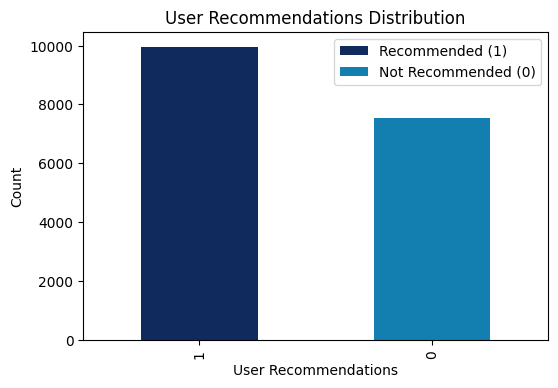

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df["user_suggestion"].value_counts() #1:positive,0:negative

# Plot
plt.figure(figsize=(6,4))
bars = sentiment_counts.plot(kind='bar', stacked=True, color=['#112A5D', '#137FB0'])
plt.title("User Recommendations Distribution")
plt.xlabel("User Recommendations")
plt.ylabel("Count")
plt.legend(bars.patches, ['Recommended (1)', 'Not Recommended (0)'])
plt.show()

### 5.2 Word Frequency Analysis

Find the most common words in positive and negative reviews.

All dataset

In [ ]:
from collections import Counter

# Combine all words
all_words = " ".join(df['cleaned_review']).split()
word_freq = Counter(all_words)

# Top 20 words
print(word_freq.most_common(20))

[('get', 12280), ('like', 11974), ('time', 8666), ('good', 7516), ('dont', 7314), ('one', 7302), ('fun', 6703), ('even', 6313), ('really', 6033), ('make', 5574), ('free', 5020), ('would', 5007), ('thing', 4765), ('new', 4759), ('people', 4662), ('much', 4611), ('want', 4491), ('money', 4322), ('card', 4241), ('still', 4135)]


Only positive reccomandation

In [ ]:
# Combine all words
all_words = " ".join(df_positive['cleaned_review']).split()
word_freq = Counter(all_words)

# Top 20 words
print(word_freq.most_common(20))

[('like', 7221), ('get', 6268), ('good', 4589), ('time', 4398), ('fun', 4230), ('one', 4054), ('really', 3654), ('free', 3504), ('dont', 3487), ('great', 2911), ('make', 2870), ('would', 2698), ('thing', 2690), ('even', 2671), ('much', 2621), ('lot', 2592), ('people', 2586), ('new', 2524), ('also', 2443), ('still', 2427)]


Only negative reccomendation

In [ ]:
# Combine all words
all_words = " ".join(df_negative['cleaned_review']).split()
word_freq = Counter(all_words)

# Top 20 words
print(word_freq.most_common(20))

[('get', 6012), ('like', 4753), ('time', 4268), ('dont', 3827), ('even', 3642), ('one', 3248), ('good', 2927), ('money', 2797), ('make', 2704), ('fun', 2473), ('really', 2379), ('would', 2309), ('new', 2235), ('want', 2226), ('pay', 2204), ('people', 2076), ('thing', 2075), ('much', 1990), ('card', 1974), ('hour', 1863)]


### 5.3 WordCloud for Visualization

Create a WordCloud to visualize frequent words in reviews.

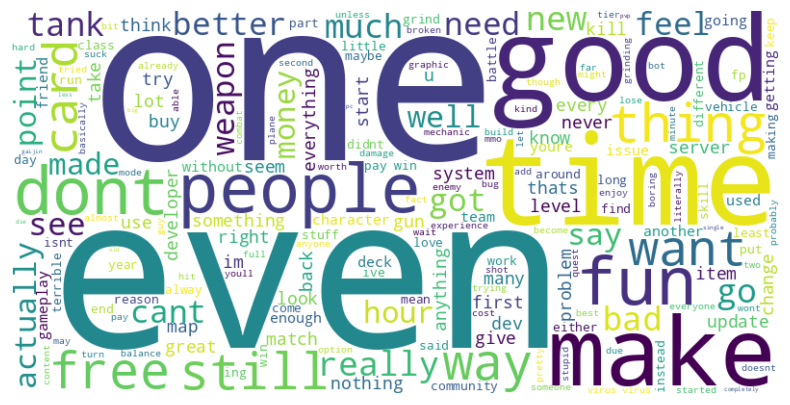

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_negative['cleaned_review']))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


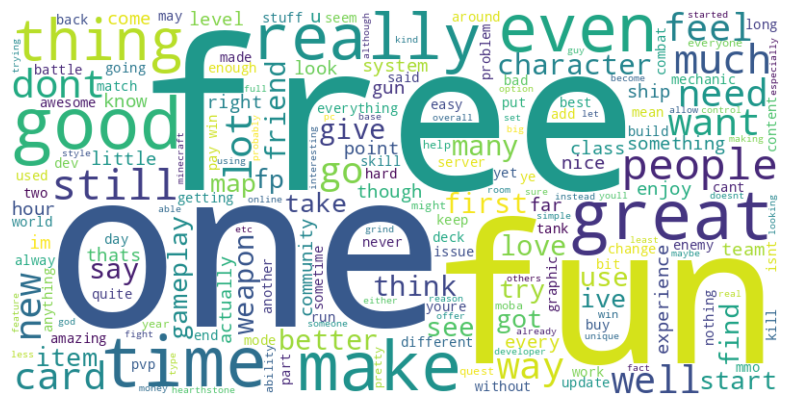

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_positive['cleaned_review']))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 5.4 Sentiment Score Calculation and Visualization Coomparison

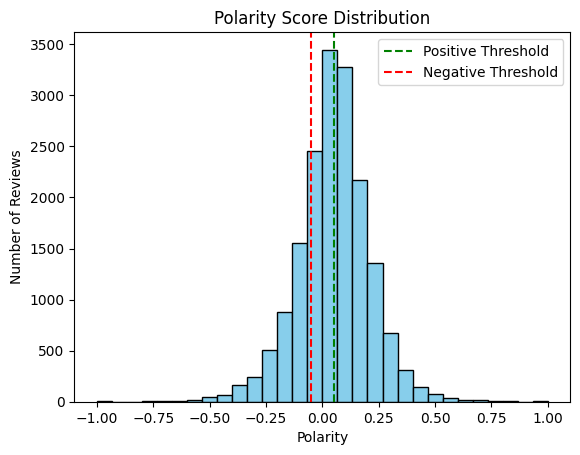

In [ ]:
plt.hist(df['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=0.05, color='green', linestyle='--', label='Positive Threshold')
plt.axvline(x=-0.05, color='red', linestyle='--', label='Negative Threshold')
plt.title("Polarity Score Distribution")
plt.xlabel("Polarity")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

In [ ]:
def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['polarity'].apply(label_sentiment)

user_suggestion     0     1
sentiment_label            
negative         2876  1128
neutral          2373  2239
positive         2277  6601


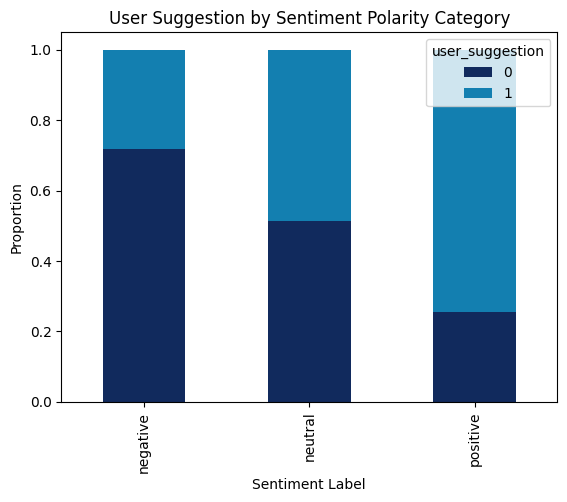

In [ ]:
ct = pd.crosstab(df['sentiment_label'], df['user_suggestion'])
print(ct)

ct_normalized = ct.div(ct.sum(axis=1), axis=0)
ct_normalized.plot(kind='bar', stacked=True, color=['#112A5D', '#137FB0'])
plt.xlabel('Sentiment Label')
plt.title('User Suggestion by Sentiment Polarity Category')
plt.ylabel('Proportion')
plt.show()

# Sentiment Analysis & Classification

# Section 1 – TF-IDF + Logistic Regression & Naïve Bayes
## Goal
Transform the cleaned text reviews into numerical feature vectors using TF-IDF (Term Frequency - Inverse Document Frequency), and train two classic machine learning models:

- Logistic Regression (robust linear classifier)

- Naïve Bayes (probabilistic model well-suited for text)

## Methodology
Use TfidfVectorizer to convert reviews into feature vectors, giving higher weights to important and rare words.

1. Split the dataset into training, validation, and test sets (70/15/15).

2. Train two models:

  - Logistic Regression: effective for binary classification.

  - Multinomial Naïve Bayes: fast and good for sparse data like text.

3. Evaluate both models using classification metrics: Accuracy, Precision, Recall, F1-Score.

4. Plot the confusion matrix for visual understanding of Logistic Regression predictions.

## Steps in the Code
Split the dataset with train_test_split (stratified).

Create a TfidfVectorizer and apply it to all sets.

Train both Logistic Regression and Naïve Bayes using .fit().

Predict on the test set and evaluate using classification_report.

Plot a confusion matrix for the Logistic Regression model using Seaborn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Define features and labels
X = df['cleaned_review']
y = df['user_suggestion']

# Step 2: Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Step 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(X_test)

In [ ]:
# Step 4: Train Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1129
           1       0.84      0.90      0.87      1496

    accuracy                           0.85      2625
   macro avg       0.85      0.84      0.84      2625
weighted avg       0.85      0.85      0.85      2625



In [ ]:
# Step 5: Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1129
           1       0.82      0.91      0.86      1496

    accuracy                           0.83      2625
   macro avg       0.84      0.82      0.83      2625
weighted avg       0.83      0.83      0.83      2625



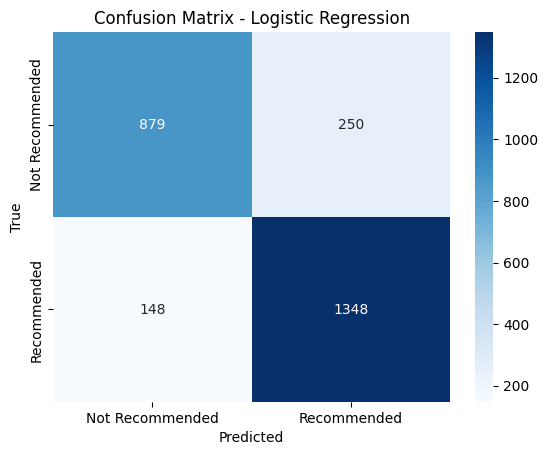

In [ ]:
# Step 6: Confusion Matrix (for LR)
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

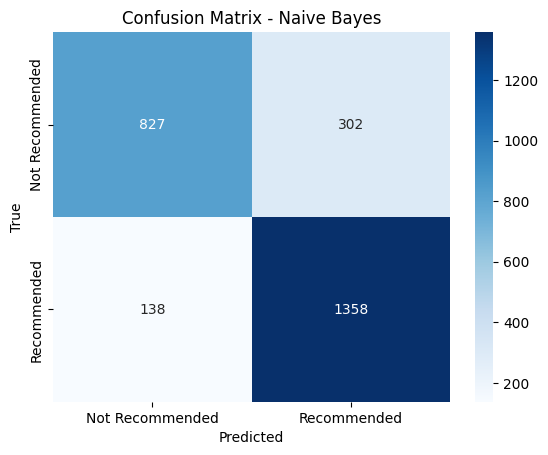

In [ ]:
# Step 6: Confusion Matrix (for NB)
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Section 2 – Word2Vec + Logistic Regression

## Goal
Use Word2Vec embeddings to convert each review into a numerical vector, then train a Logistic Regression classifier to predict whether the review recommends the game or not.

## Methodology
Use the pretrained Word2Vec model (word2vec-google-news-300) from Gensim.

For each word in a review, get its 300-dimensional vector from Word2Vec.

Compute the average of all word vectors in the review → this gives a single dense vector per review.

Feed these vectors into a Logistic Regression model.

## Steps in the Code
Load pretrained Word2Vec model.

Define a function to calculate the mean embedding for each review.

Apply it to train/val/test datasets.

Train and evaluate a Logistic Regression model on these vectors.

In [ ]:
import gensim.downloader as api

# Step 1: Load pretrained Word2Vec model (only needs to be done once)
w2v_model = api.load('word2vec-google-news-300')  # This might take a few minutes

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


# Step 2: Convert each review into average word embedding
def get_avg_embedding(text, model, dim=300):
    words = text.split()
    valid_words = [model[word] for word in words if word in model]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(dim)

# Compute embeddings
X_train_embed = np.vstack([get_avg_embedding(text, w2v_model) for text in X_train])
X_val_embed = np.vstack([get_avg_embedding(text, w2v_model) for text in X_val])
X_test_embed = np.vstack([get_avg_embedding(text, w2v_model) for text in X_test])

# Step 3: Train Logistic Regression
w2v_lr = LogisticRegression(max_iter=200)
w2v_lr.fit(X_train_embed, y_train)

# Step 4: Predict and evaluate
y_pred_w2v = w2v_lr.predict(X_test_embed)
print("=== Word2Vec + Logistic Regression ===")
print(classification_report(y_test, y_pred_w2v))

=== Word2Vec + Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1129
           1       0.82      0.86      0.84      1496

    accuracy                           0.81      2625
   macro avg       0.81      0.80      0.81      2625
weighted avg       0.81      0.81      0.81      2625



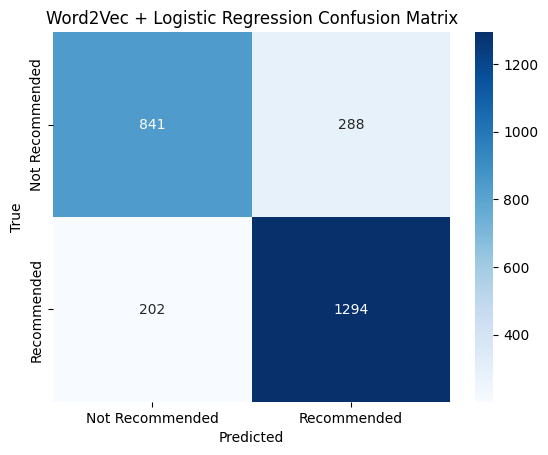

In [ ]:
cm = confusion_matrix(y_test, y_pred_w2v)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Word2Vec + Logistic Regression Confusion Matrix")
plt.show()

# Section 3 – DistilBERT Fine-Tuning (Transformers)

## Goal
Use a pretrained transformer model, DistilBERT, and fine-tune it on your dataset of cleaned game reviews to predict user recommendations.

## Why DistilBERT?
It's a lightweight version of BERT, faster and less resource-intensive.

Pretrained on massive text corpora, so it understands deep contextual meaning.

Works well on tasks like sentiment analysis with little fine-tuning.

## Steps in the Code
Install required libraries (transformers, datasets)

Tokenize the text using DistilBertTokenizerFast

Create Hugging Face Dataset objects

Fine-tune DistilBertForSequenceClassification using Trainer

Evaluate the model on the test set

In [ ]:
# Step 1: Install dependencies (run only once)
!pip install transformers datasets -q

In [ ]:
# Step 2: Import libraries
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Step 3: Prepare data
X = df["cleaned_review"].tolist()
y = df["user_suggestion"].tolist()

# Step 4: Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Step 5: Load tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Step 6: Tokenize data
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=256)

# Step 7: Prepare datasets for Trainer
train_dataset = Dataset.from_dict({**train_encodings, "label": y_train})
val_dataset = Dataset.from_dict({**val_encodings, "label": y_val})
test_dataset = Dataset.from_dict({**test_encodings, "label": y_test})

# Step 8: Load model (also public, no login or API needed)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Step 9: Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Step 10: Training configuration
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="no",
    report_to="none",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)


# Step 11: Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Step 12: Train model
trainer.train()

# Step 13: Evaluate model on test set
results = trainer.evaluate(test_dataset)
print(results)

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.435100,0.368442,0.838796,0.892962,0.814716,0.852046
2,0.252300,0.376649,0.852515,0.862092,0.882274,0.872066
3,0.189700,0.584458,0.846799,0.864576,0.866890,0.865731


{'eval_loss': 0.5916073322296143, 'eval_accuracy': 0.8548571428571429, 'eval_precision': 0.8617780661907852, 'eval_recall': 0.8877005347593583, 'eval_f1': 0.8745472505762265, 'eval_runtime': 19.3353, 'eval_samples_per_second': 135.762, 'eval_steps_per_second': 2.172, 'epoch': 3.0}


In [ ]:
# Get raw predictions (logits)
predictions = trainer.predict(test_dataset)
logits = predictions.predictions
y_pred_bert = np.argmax(logits, axis=1)
# Print classification report
print("=== DistilBERT Classification Report ===")
print(classification_report(y_test, y_pred_bert))

=== DistilBERT Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1129
           1       0.86      0.89      0.87      1496

    accuracy                           0.85      2625
   macro avg       0.85      0.85      0.85      2625
weighted avg       0.85      0.85      0.85      2625



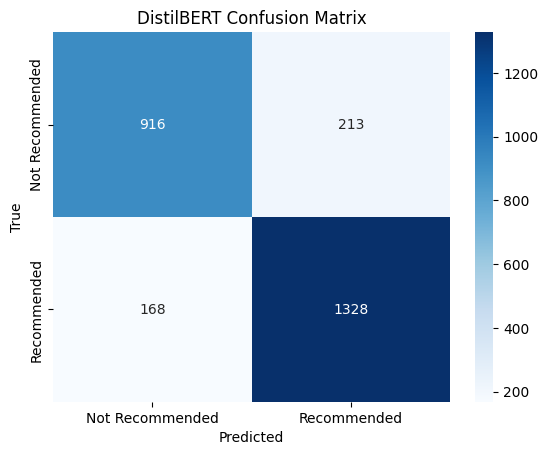

In [ ]:
cm = confusion_matrix(y_test, y_pred_bert)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DistilBERT Confusion Matrix")
plt.show()

# Section 4 – Model Performance Comparison (Table & Plot)
## Goal
Compare the performance of all models you've trained:

TF-IDF + Logistic Regression

TF-IDF + Naïve Bayes

Word2Vec + Logistic Regression

DistilBERT Fine-Tuned

…using standard classification metrics: Accuracy, Precision, Recall, F1-Score.

## Methodology
For each model, extract performance metrics (from classification_report or trainer.evaluate()).

Store the metrics in a pandas DataFrame.

Visualize the comparison using a bar chart or table.

### 1. TF-IDF + Logistic Regression / Naïve Bayes

In [ ]:
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Logistic Regression
f1_lr = report_lr['macro avg']['f1-score']
acc_lr = report_lr['accuracy']
prec_lr = report_lr['macro avg']['precision']
recall_lr = report_lr['macro avg']['recall']

#Naïve Bayes
f1_nb = report_nb['macro avg']['f1-score']
acc_nb = report_nb['accuracy']
prec_nb = report_nb['macro avg']['precision']
recall_nb = report_nb['macro avg']['recall']


### 2. Word2Vec + Logistic Regression

In [ ]:
report_w2v = classification_report(y_test, y_pred_w2v, output_dict=True)

f1_w2v = report_w2v['macro avg']['f1-score']
acc_w2v = report_w2v['accuracy']
prec_w2v = report_w2v['macro avg']['precision']
recall_w2v = report_w2v['macro avg']['recall']

### 3. DistilBERT

In [ ]:
report_bert = classification_report(y_test, y_pred_bert, output_dict=True)

f1_bert = report_bert['macro avg']['f1-score']
acc_bert = report_bert['accuracy']
prec_bert = report_bert['macro avg']['precision']
recall_bert = report_bert['macro avg']['recall']


### Final table comparison

In [ ]:
df_results = pd.DataFrame({
    "Model": [
        "TF-IDF + Logistic Regression",
        "TF-IDF + Naive Bayes",
        "Word2Vec + Logistic Regression",
        "DistilBERT"
    ],
    "Accuracy": [acc_lr, acc_nb, acc_w2v, acc_bert],
    "Precision": [prec_lr, prec_nb, prec_w2v, prec_bert],
    "Recall": [recall_lr, recall_nb, recall_w2v, recall_bert],
    "F1-Score": [f1_lr, f1_nb, f1_w2v, f1_bert]
})

# Reshape for seaborn
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

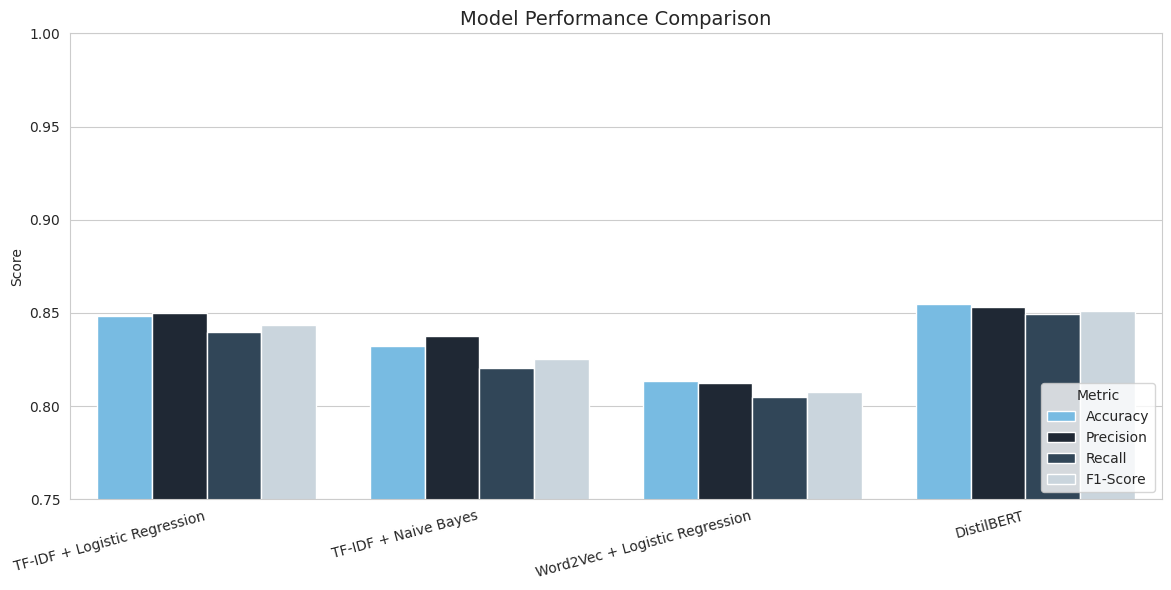

In [ ]:
# Steam-inspired color palette
steam_palette = {
    'Accuracy': '#66c0f4',      # Light Steam blue
    'Precision': '#1b2838',     # Steam dark navy
    'Recall': '#2a475e',        # Steam steel blue
    'F1-Score': '#c7d5e0'       # Light gray-blue
}

# Apply dark background
sns.set_style("whitegrid")

# Plot setup
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x="Model",
    y="Score",
    hue="Metric",
    palette=steam_palette
)

plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.xlabel("")
plt.xticks(rotation=15, ha='right')
plt.ylim(0.75, 1.0)
plt.legend(title="Metric", loc='lower right')
plt.tight_layout()

plt.show()

## Topic Modeling

# Step 1 : Bigram Frequency Visualization
## Goal
Visualize the top 20 most frequent bigrams (two-word phrases) from user reviews, excluding repeated words like "game game" or "click click".

## Methodology
Use CountVectorizer to extract all bigrams from the review text.

Count the frequency of each bigram and store them in a DataFrame.

Remove repeated-word bigrams, which often don't carry meaningful information.

Use Seaborn's barplot to visualize the top 20 most frequent and meaningful bigrams.

## Steps in the Code
Extracts bigrams (2-word phrases) from user reviews using CountVectorizer.

Counts and selects the top 20 most frequent bigrams.

Removes meaningless repeated bigrams.

Visualizes the results as a horizontal bar chart.



*-> This visualization helps us quickly understand what concepts or issues users mention together without needing to read every review.*

<ipython-input-37-669e9eaef81c>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='bigram', data=bigrams_freq, palette='mako')


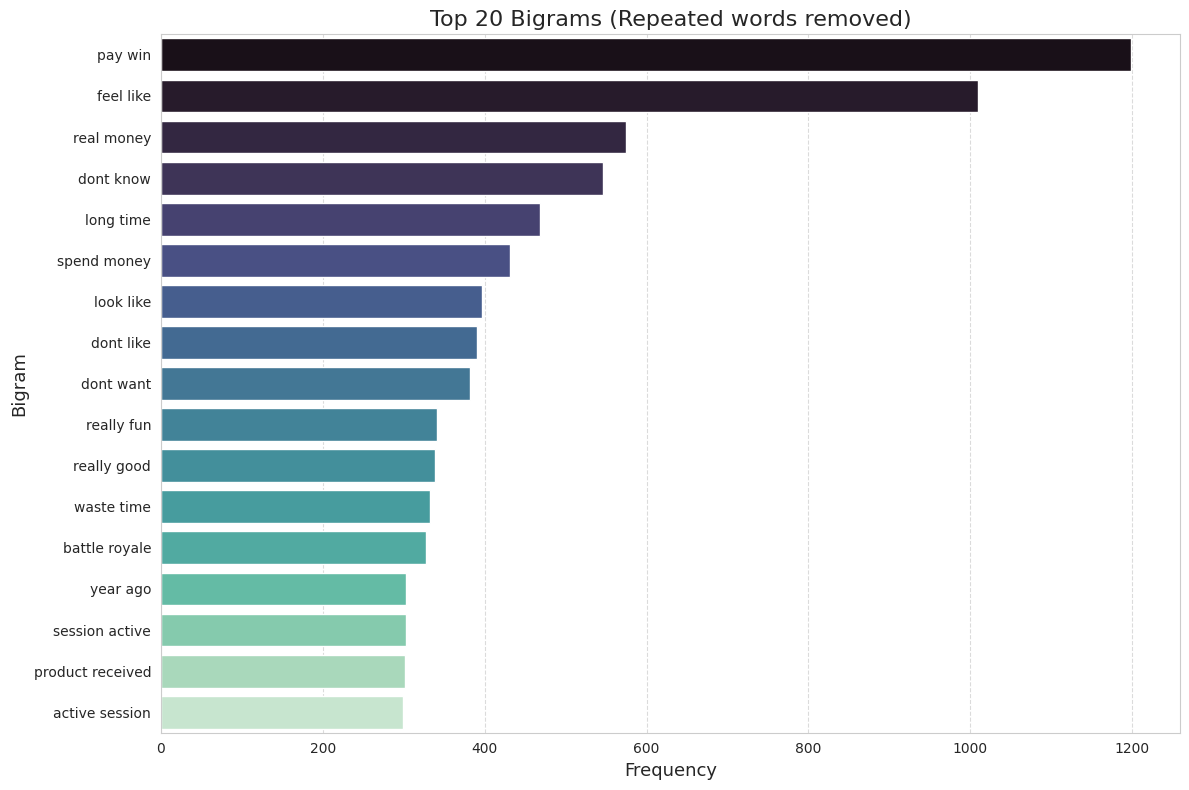

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram vectorization
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_bigram = vectorizer.fit_transform(df['cleaned_review'])

# Create DataFrame of bigram frequencies
bigrams_freq = pd.DataFrame(X_bigram.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
bigrams_freq.columns = ['Frequency']
bigrams_freq = bigrams_freq.sort_values(by='Frequency', ascending=False).head(20)

# Reset the index to create a 'bigram' column
bigrams_freq = bigrams_freq.reset_index()
bigrams_freq = bigrams_freq.rename(columns={"index": "bigram"})

# Remove ANY repeated-word bigrams automatically
bigrams_freq = bigrams_freq[
    ~bigrams_freq['bigram'].apply(lambda x: x.split()[0] == x.split()[1])
]

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='bigram', data=bigrams_freq, palette='mako')
plt.title('Top 20 Bigrams (Repeated words removed)', fontsize=16)
plt.xlabel('Frequency', fontsize=13)
plt.ylabel('Bigram', fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 2: Word Cloud Visualization of Reviews

## Goal
Generate word clouds to visually compare the most frequently mentioned words in all, positive, and negative user reviews.

## Methodology
Combine all review texts into single strings (one for each group).

Use the WordCloud class to generate a cloud of words based on their frequency.

Split the visualization into three parts: all reviews, positive reviews, and negative reviews.

## Steps in the Code
Combines all, positive, and negative reviews into separate texts.

Generates a word cloud image for each group using WordCloud.

Visualizes frequent words in user opinions in an intuitive way.

Helps identify what users talk about most in each sentiment group.

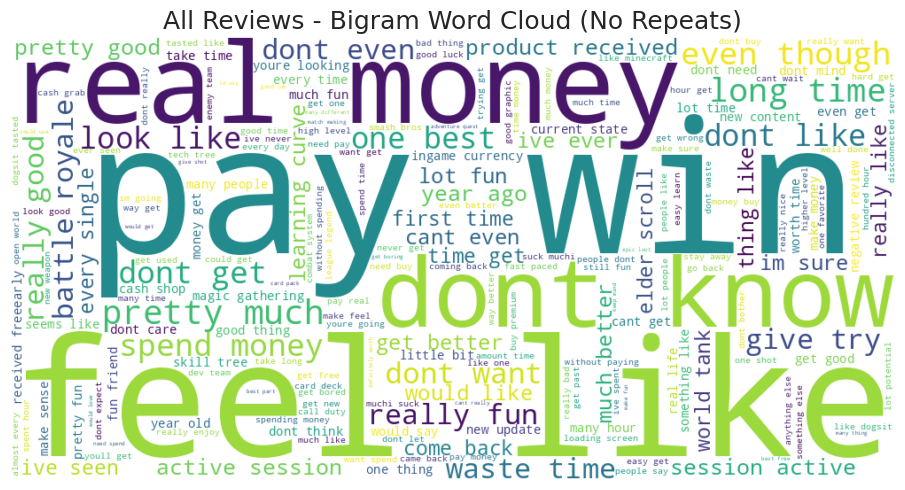

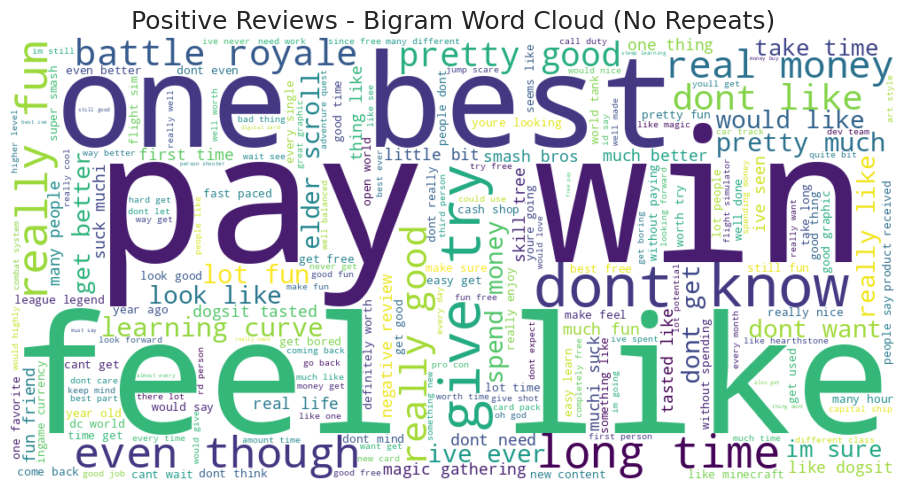

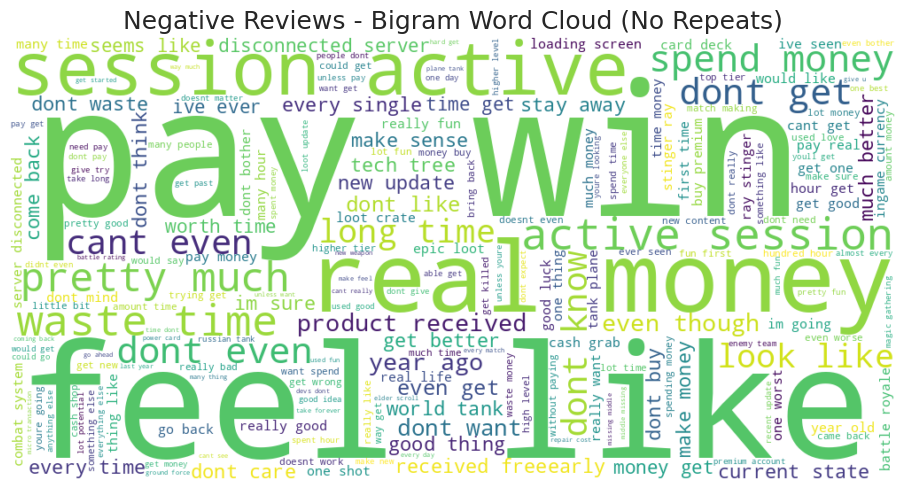

In [ ]:
def generate_clean_bigram_wordcloud(text, title):
    # Step 1: Tokenize the text
    tokens = text.lower().split()

    # Step 2: Create bigrams manually (excluding repeated ones)
    bigrams = [
        f"{tokens[i]} {tokens[i+1]}"
        for i in range(len(tokens)-1)
        if tokens[i] != tokens[i+1]
    ]

    # Step 3: Count bigram frequency
    from collections import Counter
    bigram_freq = Counter(bigrams)

    # Step 4: Generate WordCloud
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(bigram_freq)

    # Step 5: Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.tight_layout()
    plt.show()

# Create text data
all_text = " ".join(df['cleaned_review'].dropna().astype(str))
positive_text = " ".join(df[df['user_suggestion'] == 1]['cleaned_review'].dropna().astype(str))
negative_text = " ".join(df[df['user_suggestion'] == 0]['cleaned_review'].dropna().astype(str))

# Generate clean bigram WordClouds
generate_clean_bigram_wordcloud(all_text, "All Reviews - Bigram Word Cloud (No Repeats)")
generate_clean_bigram_wordcloud(positive_text, "Positive Reviews - Bigram Word Cloud (No Repeats)")
generate_clean_bigram_wordcloud(negative_text, "Negative Reviews - Bigram Word Cloud (No Repeats)")



In [ ]:
def print_top_bigrams(text, title, top_n=10):
    # Step 1: Tokenize the text
    tokens = text.lower().split()

    # Step 2: Create bigrams, exclude repeated-word pairs like "virus virus"
    bigrams = [
        f"{tokens[i]} {tokens[i+1]}"
        for i in range(len(tokens) - 1)
        if tokens[i] != tokens[i+1]
    ]

    # Step 3: Count frequencies
    bigram_freq = Counter(bigrams)

    # Step 4: Print top N bigrams
    print(f"\n🔎 Top {top_n} Bigrams in {title}:")
    for bigram, freq in bigram_freq.most_common(top_n):
        print(f"{bigram}: {freq}")

# Prepare text
all_text = " ".join(df['cleaned_review'].dropna().astype(str))
positive_text = " ".join(df[df['user_suggestion'] == 1]['cleaned_review'].dropna().astype(str))
negative_text = " ".join(df[df['user_suggestion'] == 0]['cleaned_review'].dropna().astype(str))

# Run for each group
print_top_bigrams(all_text, "All Reviews")
print_top_bigrams(positive_text, "Positive Reviews")
print_top_bigrams(negative_text, "Negative Reviews")



🔎 Top 10 Bigrams in All Reviews:
pay win: 1195
feel like: 1000
real money: 573
dont know: 499
pretty much: 480
long time: 465
even though: 443
spend money: 419
dont get: 414
one best: 391

🔎 Top 10 Bigrams in Positive Reviews:
pay win: 595
feel like: 566
one best: 335
dont know: 286
give try: 261
long time: 259
even though: 253
really fun: 252
real money: 252
battle royale: 250

🔎 Top 10 Bigrams in Negative Reviews:
pay win: 600
feel like: 434
real money: 321
session active: 301
active session: 299
waste time: 285
pretty much: 272
spend money: 245
dont even: 237
dont get: 235


# Step 3: Topic Modeling on All Reviews

## Goal
Use ***Latent Dirichlet Allocation (LDA)*** on bigrams to discover the most common topics discussed across all user reviews, removing repeated-word bigrams for clarity.

## Methodology
Use CountVectorizer with ngram_range=(2,2) to extract bigrams (two-word phrases) from the text.

Limit the vocabulary size to the top 1000 most frequent bigrams using max_features=1000.

Apply Latent Dirichlet Allocation (LDA) to identify 5 main topics, where each topic is represented by a distribution over bigrams.

Remove bigrams where the same word is repeated (e.g., "play play") to enhance topic clarity.

Extract the top 10–20 most representative bigrams for each topic.

## Steps in the Code
Converts all user reviews into bigram vectors using CountVectorizer.

Trains an LDA model on the bigram matrix to identify latent topics.

Filters out repeated-word bigrams from the final topic keywords.

Returns a DataFrame with the top bigrams per topic for interpretation.

## Why This Matters
By running topic modeling on all user reviews, we can discover what themes are most frequently discussed by players, regardless of sentiment.
Examples might include topics about game mechanics, bugs, pricing models, or multiplayer experience.

These insights can help developers or analysts understand the most prominent areas of discussion within the entire player base.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

def topic_modeling(df, n_topics=5, n_words=10):
    """
    Perform topic modeling using LDA on bigrams,
    with removal of repeated-word bigrams (e.g., 'game game').
    """
    # Bigram vectorization
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(df['cleaned_review'])

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    topic_results = {}

    for idx, topic in enumerate(lda.components_):
        # Remove repeated bigrams
        top_features = [
            feature_names[i] for i in topic.argsort()[::-1]
            if feature_names[i].split()[0] != feature_names[i].split()[1]
        ][:n_words]
        topic_results[f"Topic {idx + 1}"] = top_features

    return pd.DataFrame(topic_results)

# Run
topics = topic_modeling(df, n_topics=5, n_words=20)

print(topics)



               Topic 1          Topic 2              Topic 3          Topic 4  \
0        battle royale        dont know           real money          pay win   
1     product received   session active       learning curve       really fun   
2             year ago   active session      negative review       world tank   
3           waste time      really like             dont buy       real money   
4          spend money        dont like            dont want        dont care   
5            long time       skill tree           spent hour         year old   
6            look like      dont really          tasted like        look good   
7          pretty good        feel like          really good  ingame currency   
8   received freeearly          lot fun        dogsit tasted       new update   
9            real life    league legend          like dogsit        tech tree   
10          little bit   like minecraft           muchi suck        cash grab   
11         new content     r

In [ ]:
def topic_modeling(df, n_topics=5, n_words=10):
    """
    Perform topic modeling using LDA on bigrams,
    with removal of repeated-word bigrams (e.g., 'game game').
    """
    # Bigram vectorization
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(df['cleaned_review'])

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    topic_results = {}

    for idx, topic in enumerate(lda.components_):
        # Get the top n words and their corresponding frequencies
        top_indices = topic.argsort()[::-1]

        # Remove repeated bigrams (e.g., 'game game')
        top_features = [
            (feature_names[i], topic[i]) for i in top_indices
            if feature_names[i].split()[0] != feature_names[i].split()[1]
        ][:n_words]

        # Convert frequency to percentage
        total_weight = np.sum(topic)
        top_features_percent = [(word, weight, (weight / total_weight) * 100) for word, weight in top_features]

        topic_results[f"Topic {idx + 1}"] = top_features_percent

    # Prepare the output for each topic in a structured format
    topic_dfs = {}
    for topic, words in topic_results.items():
        topic_df = pd.DataFrame(words, columns=["Word", "Frequency", "Percentage"])
        topic_df.insert(0, "Rank", range(1, len(topic_df) + 1))  # Add Rank column
        topic_dfs[topic] = topic_df

    return topic_dfs

# Run with top 10 words
topics = topic_modeling(df, n_topics=5, n_words=10)

# Display each topic's DataFrame
for topic, topic_df in topics.items():
    print(f"{topic}:\n{topic_df}\n")


Topic 1:
   Rank                Word   Frequency  Percentage
0     1       battle royale  328.195765    2.285647
1     2    product received  302.159287    2.104322
2     3            year ago  284.635130    1.982279
3     4          waste time  247.251345    1.721928
4     5         spend money  237.420303    1.653462
5     6           long time  225.186268    1.568260
6     7           look like  217.685351    1.516022
7     8         pretty good  215.713534    1.502290
8     9  received freeearly  190.195582    1.324575
9    10           real life  184.870491    1.287490

Topic 2:
   Rank            Word   Frequency  Percentage
0     1       dont know  319.137782    2.290759
1     2  session active  303.199998    2.176358
2     3  active session  299.200000    2.147646
3     4     really like  235.260596    1.688691
4     5       dont like  228.760990    1.642038
5     6      skill tree  165.194637    1.185761
6     7     dont really  151.164260    1.085051
7     8       feel like  

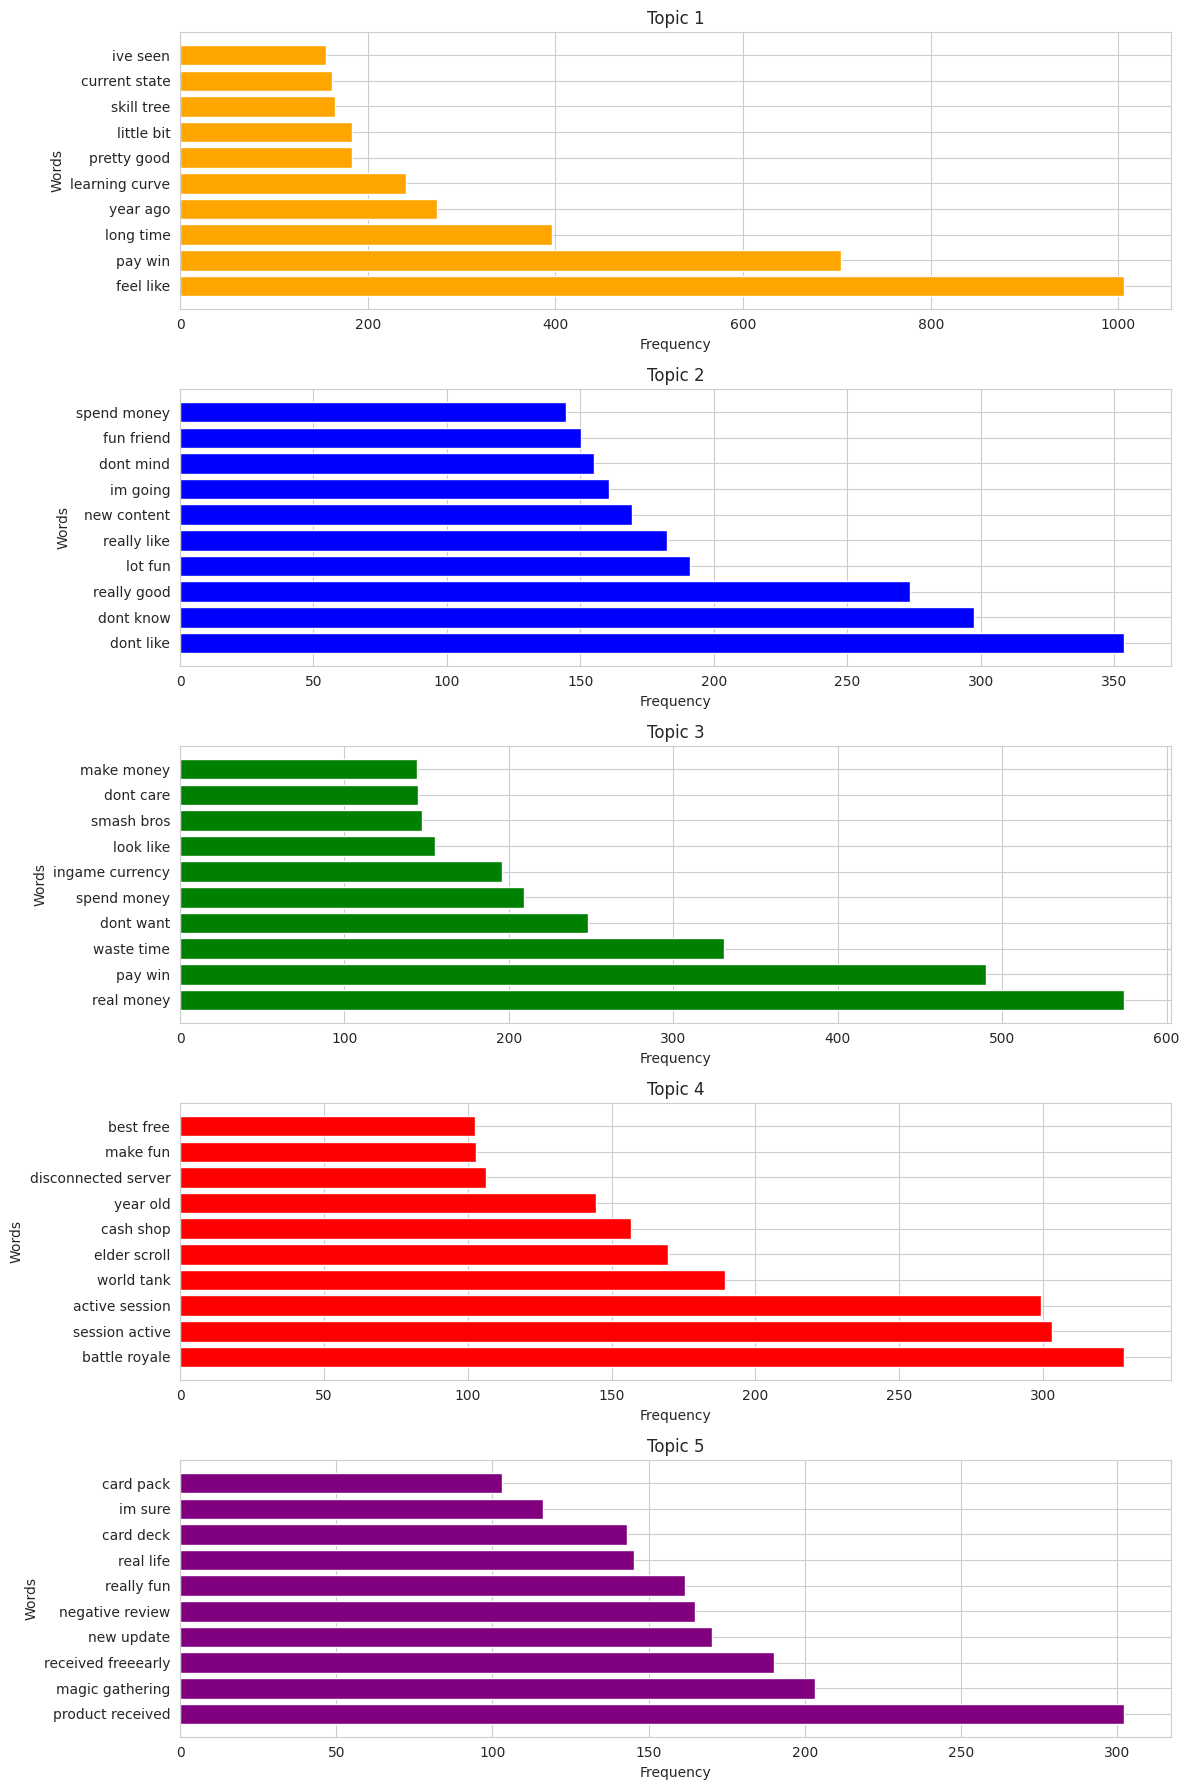

In [ ]:
# Sample Data (from your request) with top 10 words for each topic
topics = {
    "Topic 1": [("feel like", 1005.956275), ("pay win", 703.817559), ("long time", 395.868516), ("year ago", 274.316997),
                ("learning curve", 241.156455), ("pretty good", 183.068537), ("little bit", 182.799022),
                ("skill tree", 165.192623), ("current state", 162.188755), ("ive seen", 155.027160)],
    "Topic 2": [("dont like", 353.702995), ("dont know", 297.461401), ("really good", 273.611074), ("lot fun", 191.122961),
                ("really like", 182.430887), ("im going", 160.787664), ("new content", 169.166213), ("fun friend", 150.234175),
                ("spend money", 144.642136), ("dont mind", 154.967888)],
    "Topic 3": [("real money", 574.193847), ("pay win", 489.919257), ("waste time", 330.694572), ("dont want", 248.312460),
                ("spend money", 209.262964), ("ingame currency", 195.662219), ("look like", 154.967888),
                ("smash bros", 147.194801), ("dont care", 144.785717), ("make money", 144.121360)],
    "Topic 4": [("battle royale", 328.197204), ("session active", 303.199999), ("active session", 299.200000),
                ("world tank", 189.423506), ("elder scroll", 169.735571), ("cash shop", 156.910125),
                ("year old", 144.603323), ("disconnected server", 106.199295), ("make fun", 103.058537),
                ("best free", 102.630641)],
    "Topic 5": [("product received", 302.194319), ("magic gathering", 203.197476), ("received freeearly", 190.196142),
                ("new update", 170.192042), ("negative review", 164.782823), ("really fun", 161.581326),
                ("real life", 145.356797), ("card deck", 143.196577), ("im sure", 116.155846),
                ("card pack", 103.197124)]
}

# Plotting each topic's word frequency in decreasing order of frequency
fig, axes = plt.subplots(len(topics), 1, figsize=(12, 18))

# Define distinct colors for each topic
colors = ['orange', 'blue', 'green', 'red', 'purple']

# Plot each topic
for i, (topic, words) in enumerate(topics.items()):
    words, frequencies = zip(*sorted(words, key=lambda x: x[1], reverse=True))  # Sort words by frequency (descending)

    # Create horizontal bar chart
    axes[i].barh(words, frequencies, color=colors[i % len(colors)])
    axes[i].set_title(f"{topic}")
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Words')

plt.tight_layout()
plt.show()


# Step 4: Topic Modeling by Sentiment Group (Positive vs. Negative Reviews)

## Goal
Use Latent Dirichlet Allocation (LDA) on bigrams to extract and compare the most discussed topics in positive and negative user reviews.

## Methodology
Split user reviews into two groups based on sentiment: positive (user_suggestion == 1) and negative (user_suggestion == 0).

Use CountVectorizer to extract bigrams (2-word combinations) from each group of reviews.

Apply LDA to the bigram matrix to extract latent topics — each topic is a distribution over bigrams.

For each topic, extract the top 10 most important bigrams, skipping ones with repeated words (e.g., "virus virus", "click click").

Display the results in two clean tables for comparison.

## Steps in the Code
Preprocesses text data by group and converts them to bigram vectors.

Applies LDA to uncover 5 topics for each sentiment group.
Filters out uninformative repeated bigrams.

Outputs a clean table showing the top 10 bigrams per topic for both positive and negative reviews.

## Why This Matters
This analysis helps us identify what users love vs. what they complain about:

Positive reviews might highlight things like "great graphics", "fun gameplay", or "beautiful world".
Negative reviews might focus on "pay win", "server crash", or "bug report".

Understanding the key themes in each group can guide product improvements, communication strategies, or even marketing priorities.

In [ ]:
# Define a function to perform topic modeling using LDA with bigrams
def get_topics_by_group(texts, n_topics=5, n_words=10):
    # 1. Vectorize the input texts into bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)

    # 2. Fit the LDA model to the bigram matrix
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # 3. Get top bigrams per topic, excluding repeated-word bigrams
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = {}
    for idx, topic in enumerate(lda.components_):
        top_bigrams = [
            feature_names[i] for i in topic.argsort()[::-1]
            if feature_names[i].split()[0] != feature_names[i].split()[1]  # skip repeated bigrams like "game game"
        ][:n_words]
        topic_keywords[f"Topic {idx + 1}"] = top_bigrams

    return pd.DataFrame(topic_keywords)

# ✅ Filter reviews that are marked as positive
positive_texts = df[df['user_suggestion'] == 1]['cleaned_review'].dropna()
positive_topics = get_topics_by_group(positive_texts)

# ❌ Filter reviews that are marked as negative
negative_texts = df[df['user_suggestion'] == 0]['cleaned_review'].dropna()
negative_topics = get_topics_by_group(negative_texts)

# Display the resulting top bigrams per topic
print("\n✅ Positive Review Topics:")
print(positive_topics)

print("\n❌ Negative Review Topics:")
print(negative_topics)


✅ Positive Review Topics:
           Topic 1          Topic 2          Topic 3         Topic 4  \
0    battle royale        dont know        feel like       long time   
1     elder scroll          im sure       really fun     tasted like   
2  magic gathering       suck muchi      really good   dogsit tasted   
3       world tank       muchi suck       skill tree     like dogsit   
4        look like  negative review        look good  learning curve   
5          lot fun        real life      really nice      easy learn   
6        dont like       little bit        dont want       best free   
7        feel like        good time     capital ship        year old   
8       flight sim        ive spent      really like        good fun   
9        rd person        cash shop  adventure quest        year ago   

            Topic 5  
0           pay win  
1        real money  
2       pretty good  
3         dont need  
4        smash bros  
5         dont know  
6  product received  
7   

In [ ]:
# Define a function to perform topic modeling using LDA with bigrams
def get_topics_by_group(texts, n_topics=5, n_words=10):
    # 1. Vectorize the input texts into bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)

    # 2. Fit the LDA model to the bigram matrix
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # 3. Get top bigrams per topic, excluding repeated-word bigrams
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = {}
    topic_freq = {}
    for idx, topic in enumerate(lda.components_):
        top_bigrams = [
            feature_names[i] for i in topic.argsort()[::-1]
            if feature_names[i].split()[0] != feature_names[i].split()[1]  # skip repeated bigrams like "game game"
        ][:n_words]
        topic_keywords[f"Topic {idx + 1}"] = top_bigrams

        # Use the actual frequency (raw count) instead of percentage
        word_freq = [
            (feature_names[i], topic[i]) for i in topic.argsort()[::-1]
            if feature_names[i].split()[0] != feature_names[i].split()[1]  # skip repeated bigrams like "game game"
        ][:n_words]
        topic_freq[f"Topic {idx + 1}"] = word_freq

    # Format the results into a DataFrame
    result_data = {}
    for topic, freqs in topic_freq.items():
        words, frequencies = zip(*freqs)
        result_data[topic] = list(zip(range(1, len(words)+1), words, frequencies))

    return result_data

# ✅ Filter reviews that are marked as positive
positive_texts = df[df['user_suggestion'] == 1]['cleaned_review'].dropna()
positive_topics = get_topics_by_group(positive_texts)

# ❌ Filter reviews that are marked as negative
negative_texts = df[df['user_suggestion'] == 0]['cleaned_review'].dropna()
negative_topics = get_topics_by_group(negative_texts)

# Create individual DataFrames for each topic in positive and negative categories (using raw frequency)
positive_topic_dfs = {
    topic: pd.DataFrame(data, columns=["Rank", "Word", "Frequency"])
    for topic, data in positive_topics.items()
}

negative_topic_dfs = {
    topic: pd.DataFrame(data, columns=["Rank", "Word", "Frequency"])
    for topic, data in negative_topics.items()
}

# Display the DataFrames for the positive and negative topics
for topic, df in positive_topic_dfs.items():
    print(f"Positive Review - {topic}")
    print(df)

for topic, df in negative_topic_dfs.items():
    print(f"Negative Review - {topic}")
    print(df)


Positive Review - Topic 1
   Rank             Word   Frequency
0     1    battle royale  250.196300
1     2     elder scroll  163.760074
2     3  magic gathering  146.197865
3     4       world tank  109.196518
4     5        look like  102.748578
5     6          lot fun   94.721989
6     7        dont like   88.889252
7     8        feel like   79.804479
8     9       flight sim   79.190794
9    10        rd person   72.187391
Positive Review - Topic 2
   Rank             Word   Frequency
0     1        dont know  164.294592
1     2          im sure  126.894944
2     3       suck muchi  122.200000
3     4       muchi suck  122.200000
4     5  negative review  109.389668
5     6        real life  108.907800
6     7       little bit   88.176499
7     8        good time   83.153119
8     9        ive spent   76.124752
9    10        cash shop   68.094947
Positive Review - Topic 3
   Rank             Word   Frequency
0     1        feel like  454.067476
1     2       really fun  253.1901

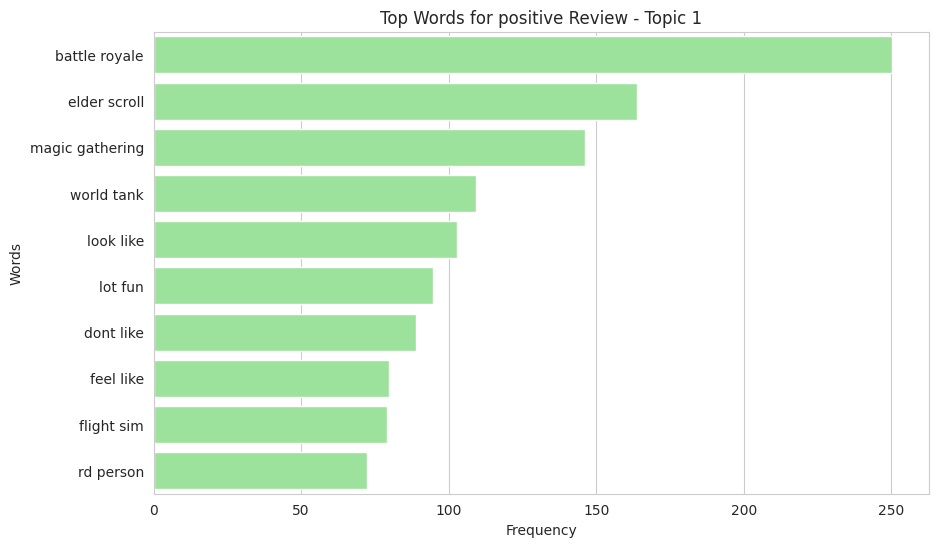

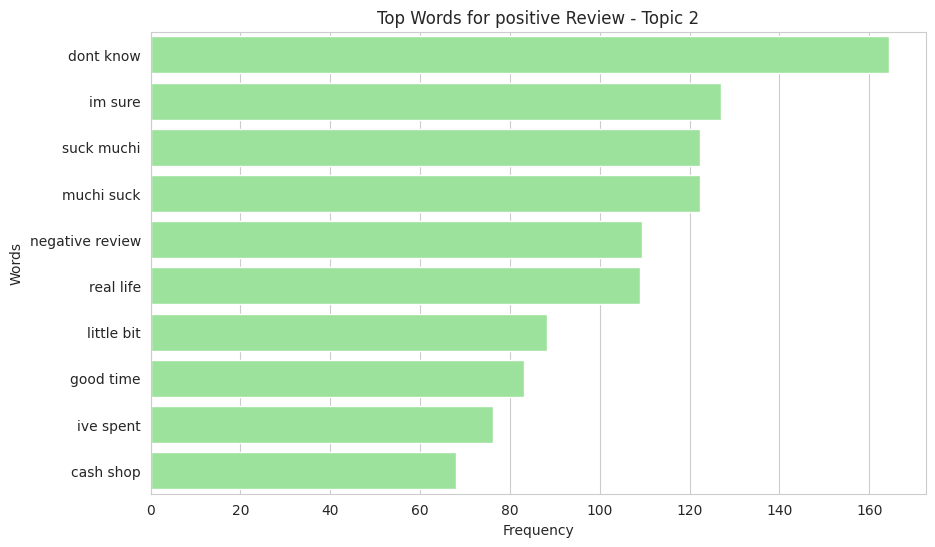

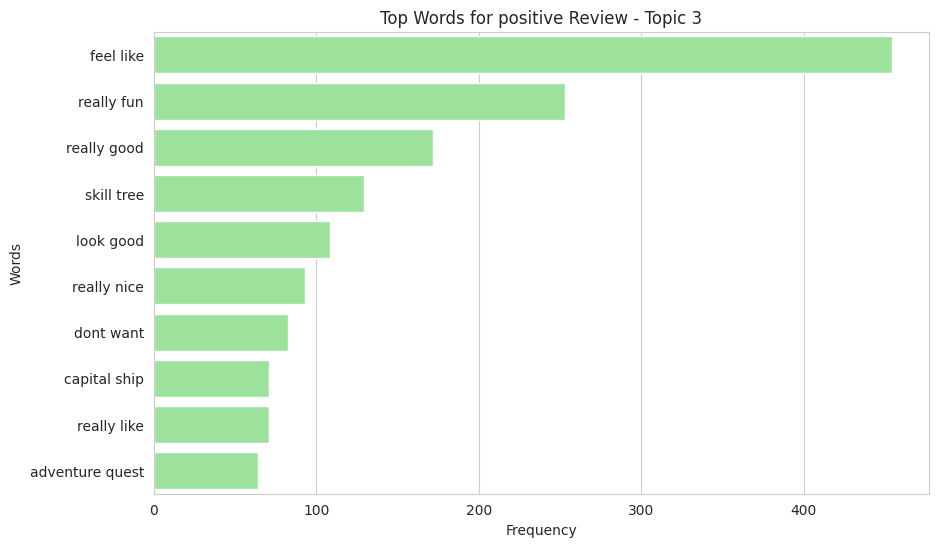

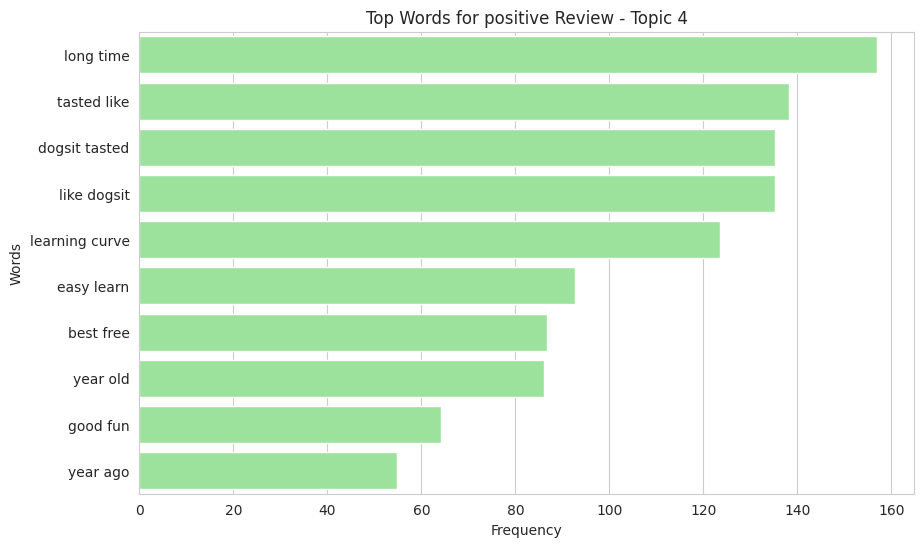

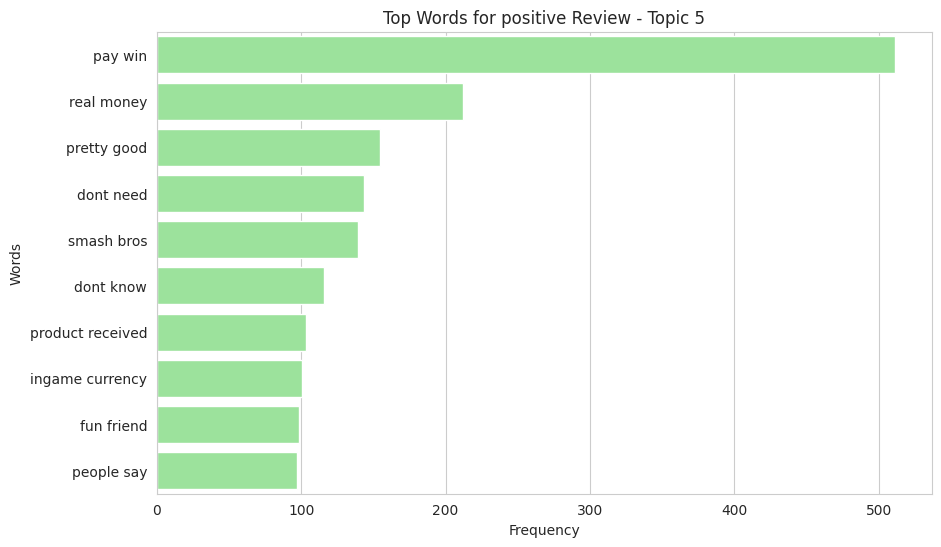

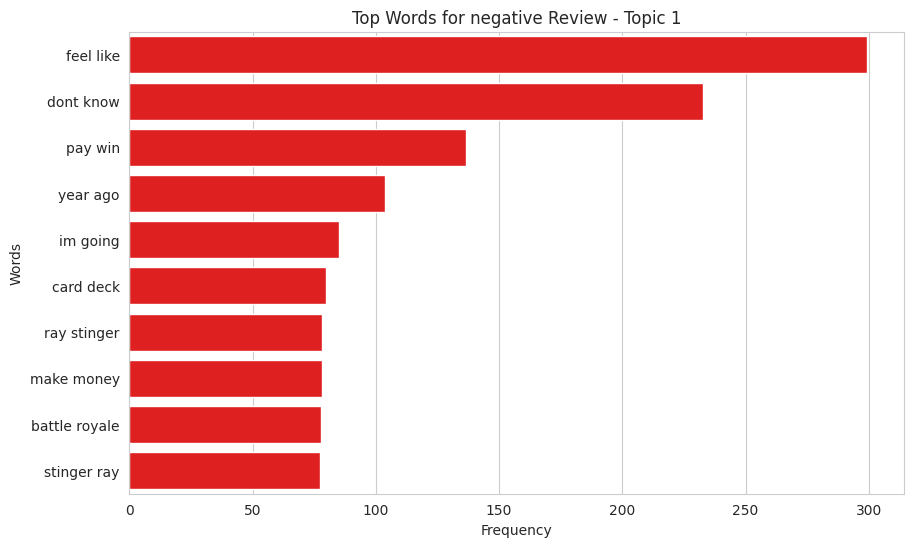

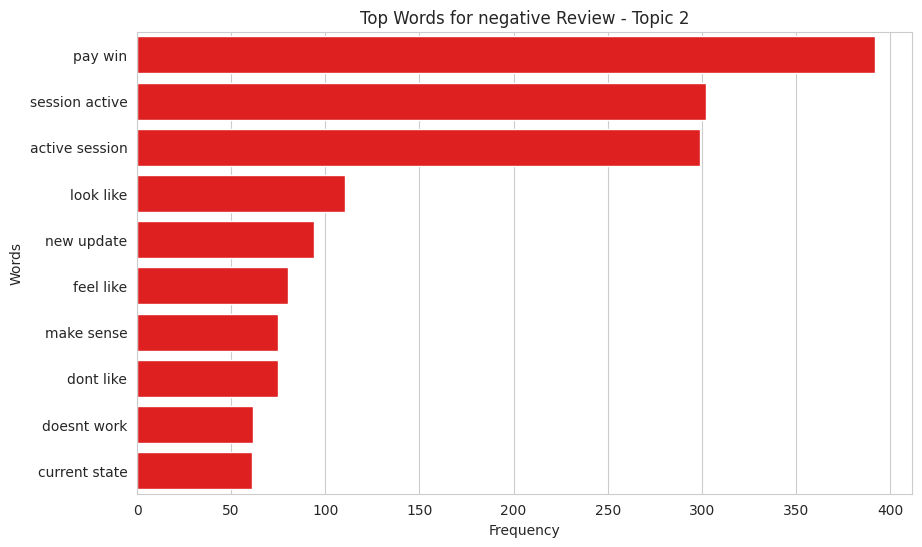

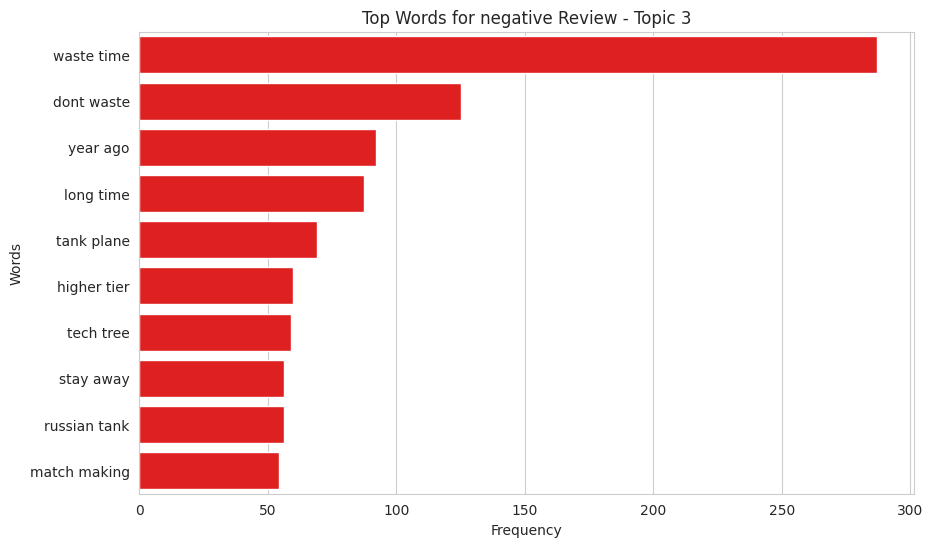

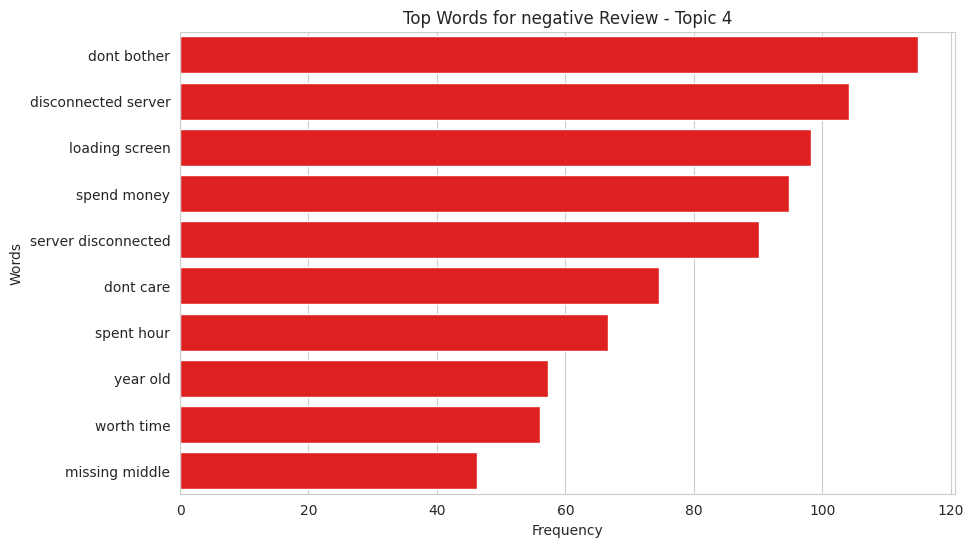

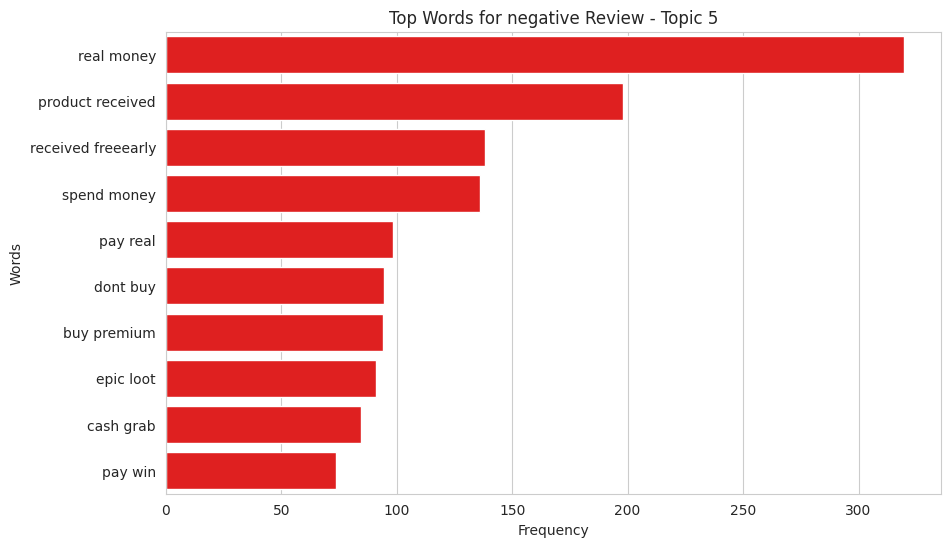

In [ ]:
# Function to create visualizations for each topic with custom colors
def plot_topics(topic_dfs, sentiment, color):
    for topic, df in topic_dfs.items():
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Frequency', y='Word', data=df, color=color)
        plt.title(f'Top Words for {sentiment} Review - {topic}')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()

# Visualize Positive Topics with Light Green
plot_topics(positive_topic_dfs, sentiment='positive', color='lightgreen')

# Visualize Negative Topics with Bright Red
plot_topics(negative_topic_dfs, sentiment='negative', color='red')

